<a href="https://colab.research.google.com/github/Ciro125/Alura/blob/main/Machine_Learning_Alura_Care_lidando_com_dados_de_muitas_dimens%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entrada de dados

In [ ]:
import pandas as pd

resultados_exames = pd.read_csv("/content/ml-lidando-com-dados-de-muitas-dimensoes.csv")
resultados_exames.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [ ]:
from sklearn.model_selection import train_test_split
from numpy import random

SEED = 123143
random.seed(SEED)

valores_exames = resultados_exames.drop(columns=["id","diagnostico"])
diagnostico = resultados_exames.diagnostico

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames,
                                                        diagnostico)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classificador = RandomForestClassifier(n_estimators = 100)
classificador.fit(treino_x, treino_y)

print(classificador.score(teste_x, teste_y))

ValueError: ignored

## Trabalho com valores vazios

In [ ]:
resultados_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           569 non-null    int64  
 1   diagnostico  569 non-null    object 
 2   exame_1      569 non-null    float64
 3   exame_2      569 non-null    float64
 4   exame_3      569 non-null    float64
 5   exame_4      569 non-null    float64
 6   exame_5      569 non-null    float64
 7   exame_6      569 non-null    float64
 8   exame_7      569 non-null    float64
 9   exame_8      569 non-null    float64
 10  exame_9      569 non-null    float64
 11  exame_10     569 non-null    float64
 12  exame_11     569 non-null    float64
 13  exame_12     569 non-null    float64
 14  exame_13     569 non-null    float64
 15  exame_14     569 non-null    float64
 16  exame_15     569 non-null    float64
 17  exame_16     569 non-null    float64
 18  exame_17     569 non-null    float64
 19  exame_18

In [ ]:
419/569

0.7363796133567663

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from numpy import random

SEED = 123143
random.seed(SEED)

valores_exames = resultados_exames.drop(columns=["id","diagnostico"])
diagnostico = resultados_exames.diagnostico
valores_exames_v1 = valores_exames.drop(columns="exame_33")

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v1,
                                                        diagnostico,
                                                        test_size = 0.3)

classificador = RandomForestClassifier(n_estimators = 100)
classificador.fit(treino_x, treino_y)

print("Resultado da classificação %.2f%%" %(classificador.score(teste_x, teste_y)*100))

Resultado da classificação 92.40%


In [ ]:
from sklearn.dummy import DummyClassifier

SEED = 123143
random.seed(SEED)

classificador_bobo = DummyClassifier(strategy= "most_frequent")
classificador_bobo.fit(treino_x, treino_y)

print("Resultado da classificação boba  %.2f%%" %(classificador_bobo.score(teste_x, teste_y)*100))

Resultado da classificação boba  66.67%


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'exame_1'),
  Text(1, 0, 'exame_2'),
  Text(2, 0, 'exame_3'),
  Text(3, 0, 'exame_4'),
  Text(4, 0, 'exame_5'),
  Text(5, 0, 'exame_6'),
  Text(6, 0, 'exame_7'),
  Text(7, 0, 'exame_8'),
  Text(8, 0, 'exame_9'),
  Text(9, 0, 'exame_10')])

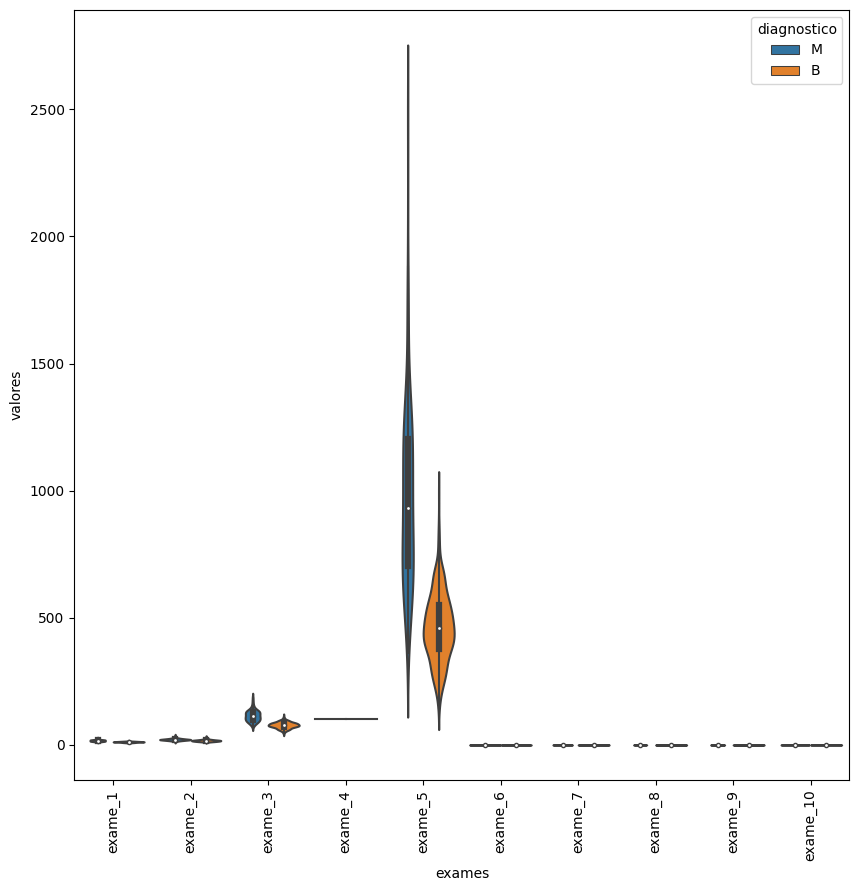

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

dados_plot = pd.concat([diagnostico, valores_exames_v1.iloc[:,0:10]], axis = 1)
dados_plot = pd.melt(dados_plot, id_vars = "diagnostico",
                     var_name = "exames",
                     value_name = "valores")

plt.figure(figsize=(10,10))
sns.violinplot(x = "exames", y = "valores", hue="diagnostico",
               data = dados_plot)
plt.xticks(rotation = 90)

In [ ]:
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)
valores_exames_v2 = padronizador.transform(valores_exames_v1)
valores_exames_v2

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'exame_1'),
  Text(1, 0, 'exame_2'),
  Text(2, 0, 'exame_3'),
  Text(3, 0, 'exame_4'),
  Text(4, 0, 'exame_5'),
  Text(5, 0, 'exame_6'),
  Text(6, 0, 'exame_7'),
  Text(7, 0, 'exame_8'),
  Text(8, 0, 'exame_9'),
  Text(9, 0, 'exame_10')])

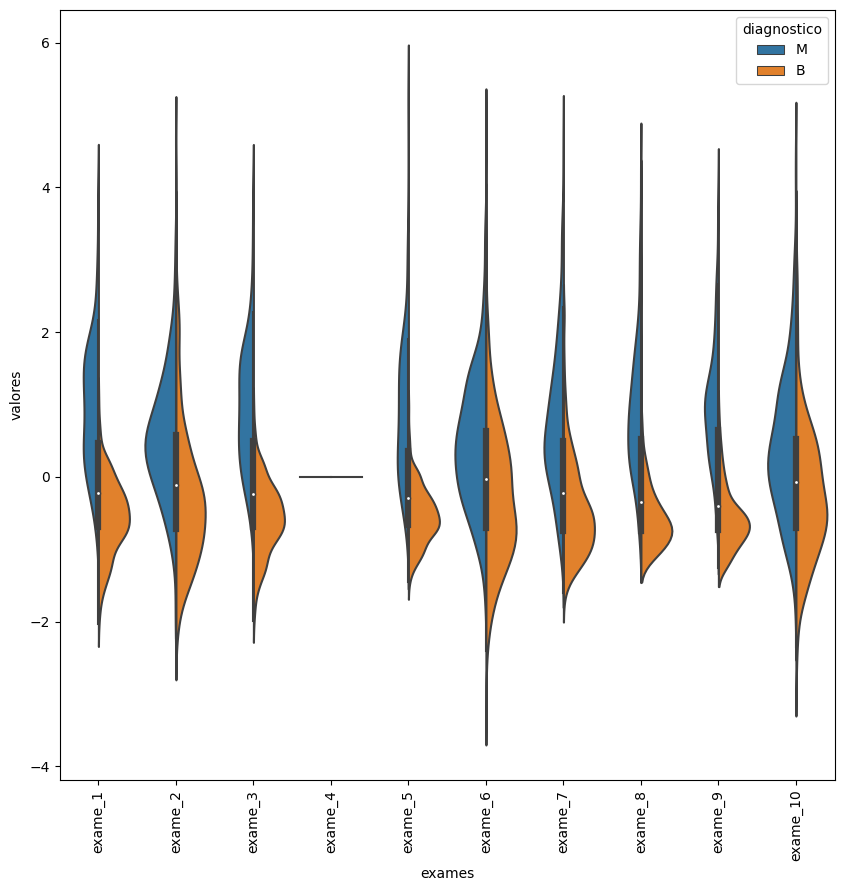

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)
valores_exames_v2 = padronizador.transform(valores_exames_v1)
valores_exames_v2 = pd.DataFrame(data = valores_exames_v2,
                                    columns = valores_exames_v1.keys())

dados_plot = pd.concat([diagnostico, valores_exames_v2.iloc[:,0:10]], axis = 1)
dados_plot = pd.melt(dados_plot, id_vars = "diagnostico",
                     var_name = "exames",
                     value_name = "valores")

plt.figure(figsize=(10,10))
sns.violinplot(x = "exames", y = "valores", hue="diagnostico",
               data = dados_plot, split=True)
plt.xticks(rotation = 90)

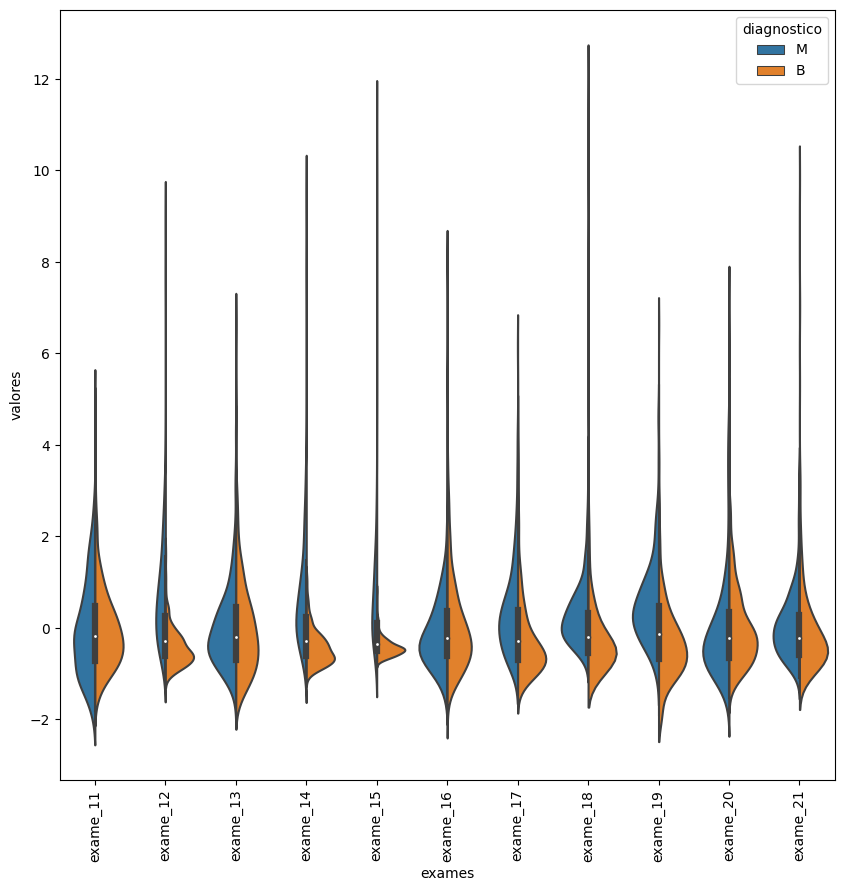

In [ ]:
def grafico_violino(valores, inicio, fim):
  dados_plot = pd.concat([diagnostico, valores.iloc[:,inicio:fim]], axis = 1)
  dados_plot = pd.melt(dados_plot, id_vars = "diagnostico",
                     var_name = "exames",
                     value_name = "valores")

  plt.figure(figsize=(10,10))
  sns.violinplot(x = "exames", y = "valores", hue="diagnostico",
               data = dados_plot, split=True)
  plt.xticks(rotation = 90)

grafico_violino(valores_exames_v2,10,21)

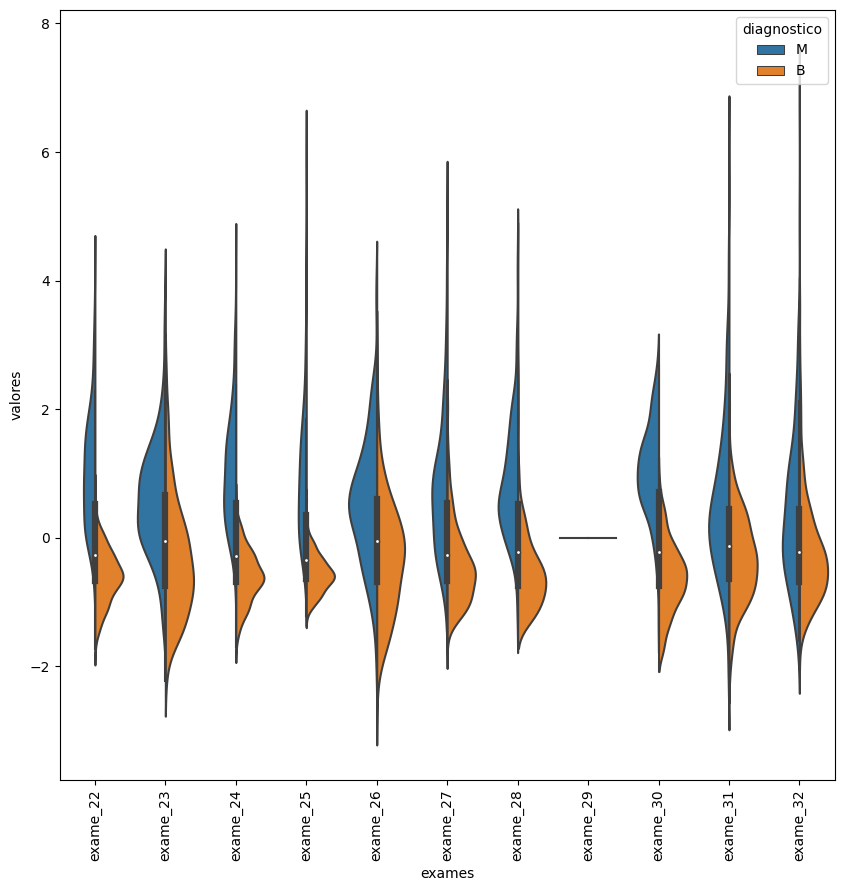

In [ ]:
grafico_violino(valores_exames_v2,21,32)

In [ ]:
valores_exames_v3 = valores_exames_v2.drop(columns = ["exame_29","exame_4"])

def classificar(valores):
  SEED = 1234
  random.seed(SEED)
  treino_x, teste_x, treino_y, teste_y = train_test_split(valores,
                                                        diagnostico,
                                                        test_size = 0.3)

  classificador = RandomForestClassifier(n_estimators = 100)
  classificador.fit(treino_x, treino_y)
  print("Resultado da classificação %.2f%%" %(classificador.score(teste_x, teste_y)*100))

classificar(valores_exames_v3)

Resultado da classificação 92.98%


## Dados correlacionados

In [ ]:
valores_exames_v3.corr()

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
exame_2,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
exame_3,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
exame_5,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
exame_6,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
exame_7,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
exame_8,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
exame_9,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
exame_10,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
exame_11,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


<Axes: >

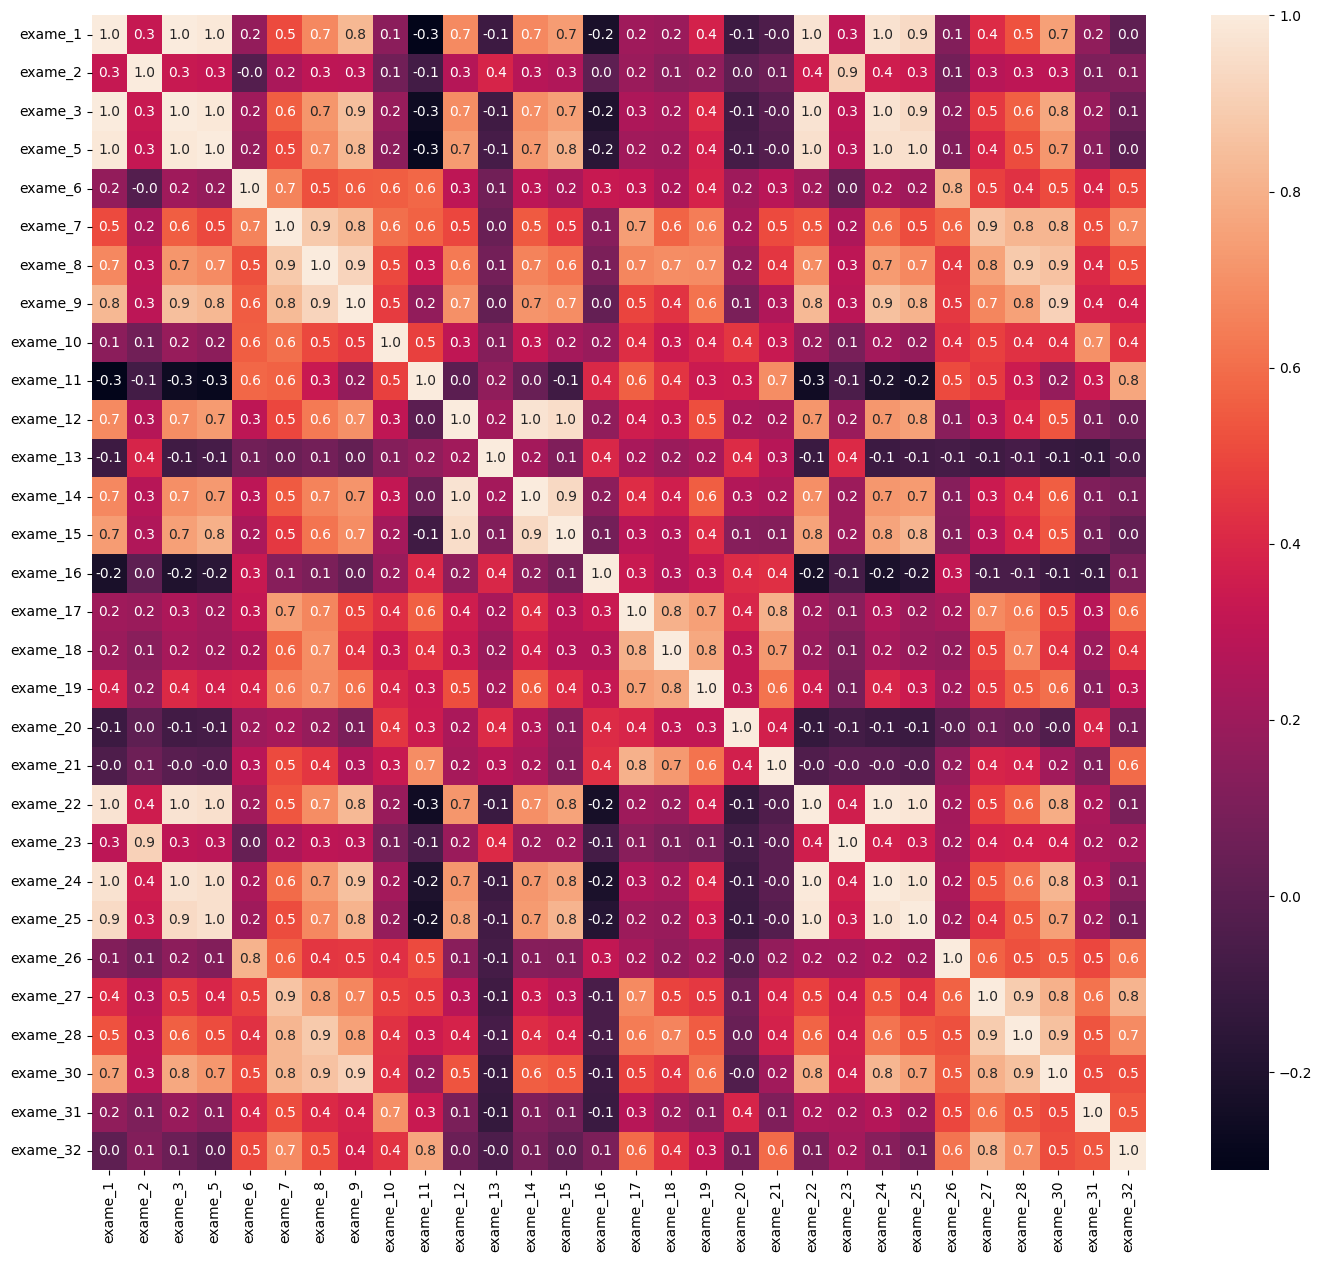

In [ ]:
matriz_correlacao = valores_exames_v3.corr()

plt.figure(figsize = (17,15))
sns.heatmap(matriz_correlacao, annot = True, fmt = ".1f")

In [ ]:
matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao>0.99]

In [ ]:
matriz_correlacao_v2 = matriz_correlacao_v1.sum()
matriz_correlacao_v2

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [ ]:
variaveis_correlacionadas = matriz_correlacao_v2[matriz_correlacao_v2>1]
variaveis_correlacionadas

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [ ]:
valores_exames_v4 = valores_exames_v3.drop(columns=variaveis_correlacionadas.keys())
valores_exames_v4.head()

,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,...,exame_20,exame_21,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,...,1.148757,0.907083,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,...,-0.805450,-0.099444,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,...,0.237036,0.293559,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,...,4.732680,2.047511,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,...,-0.361092,0.499328,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [ ]:
classificar (valores_exames_v4)

Resultado da classificação 91.81%


In [ ]:
valores_exames_v5 = valores_exames_v3.drop(columns=["exame_3","exame_24"])
valores_exames_v5.head()

,exame_1,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,...,exame_21,exame_22,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,1.097064,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,...,0.907083,1.886690,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,...,-0.099444,1.805927,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,...,0.293559,1.511870,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,...,2.047511,-0.281464,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,...,0.499328,1.298575,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [ ]:
classificar (valores_exames_v5)

Resultado da classificação 92.98%


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

seleciona_kmelhores = SelectKBest(chi2, k=5)

In [ ]:
seleciona_kmelhores

SelectKBest(k=5, score_func=<function chi2 at 0x7f26f3facdc0>)

In [ ]:
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v5,
                                                        diagnostico,
                                                        test_size = 0.3)

seleciona_kmelhores.fit(treino_x,treino_y)

ValueError: ignored

In [ ]:
valores_exames_v6 = valores_exames_v1.drop(columns=(["exame_4","exame_29","exame_3","exame_24"]))

In [ ]:
SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6,
                                                        diagnostico,
                                                        test_size = 0.3)

seleciona_kmelhores.fit(treino_x,treino_y)
treino_kbest = seleciona_kmelhores.transform(treino_x)
teste_kbest = seleciona_kmelhores.transform(teste_x)

In [ ]:
teste_kbest.shape

(171, 5)

In [ ]:
classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_kbest, treino_y)

print("Resultado da classificação %.2f%%" %(classificador.score(teste_kbest, teste_y)*100))

Resultado da classificação 92.40%


## Matriz de confusão

In [ ]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_kbest))

[Text(0.5, 29.249999999999986, 'Predição'), Text(39.75, 0.5, 'Real')]

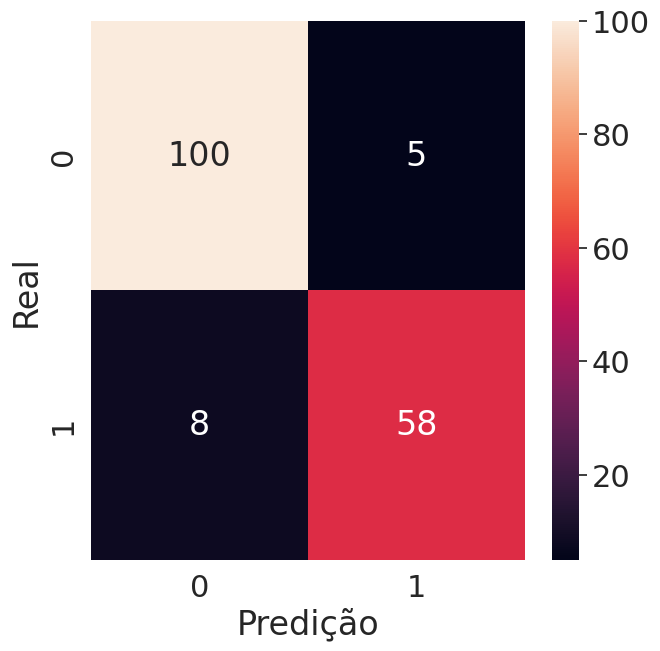

In [ ]:
plt.figure(figsize=(7,7))
sns.set(font_scale=2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel="Predição",ylabel="Real") 

Resultado da classificação 90.06%


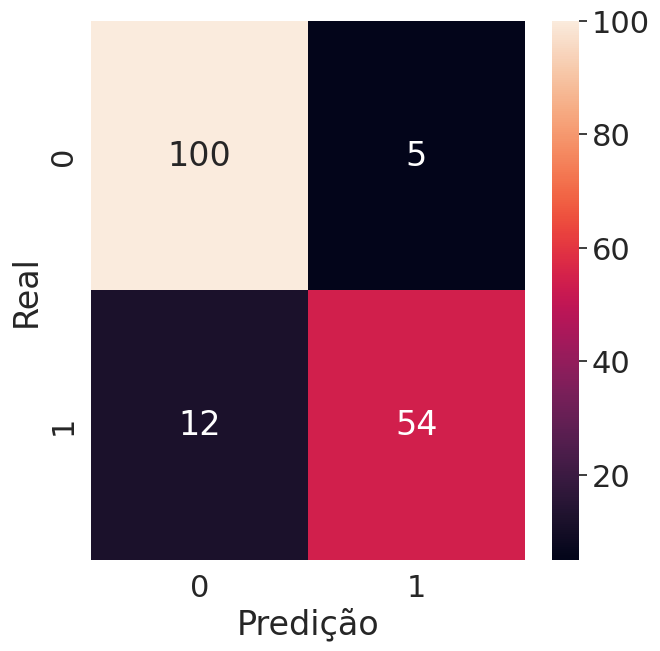

In [ ]:
from sklearn.feature_selection import RFE 

SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6,
                                                        diagnostico,
                                                        test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_x, treino_y)
selecionar_rfe = RFE(estimator=classificador, n_features_to_select=5, step = 1)
selecionar_rfe.fit(treino_x,treino_y)
treino_rfe = selecionar_rfe.transform(treino_x)
teste_rfe = selecionar_rfe.transform(teste_x)

classificador.fit(treino_rfe, treino_y)

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfe))
plt.figure(figsize=(7,7))
sns.set(font_scale=2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel="Predição",ylabel="Real") 

print("Resultado da classificação %.2f%%" %(classificador.score(teste_rfe, teste_y)*100))

## Visualizando os dados no plano

Resultado da classificação 92.98%


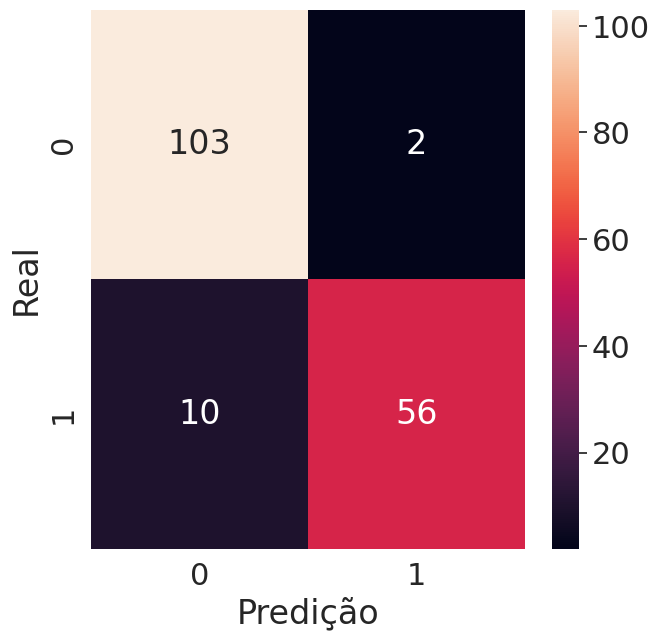

In [ ]:
from sklearn.feature_selection import RFECV

SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6,
                                                        diagnostico,
                                                        test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_x, treino_y)
selecionar_rfecv = RFECV(estimator=classificador, cv = 5, step = 1, scoring="accuracy")
selecionar_rfecv.fit(treino_x,treino_y)
treino_rfecv = selecionar_rfecv.transform(treino_x)
teste_rfecv = selecionar_rfecv.transform(teste_x)

classificador.fit(treino_rfecv, treino_y)

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfecv))
plt.figure(figsize=(7,7))
sns.set(font_scale=2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel="Predição",ylabel="Real") 

print("Resultado da classificação %.2f%%" %(classificador.score(teste_rfecv, teste_y)*100))

In [ ]:
len(selecionar_rfecv.support_)

28

In [ ]:
selecionar_rfecv.cv_results_

{'mean_test_score': array([0.86936709, 0.93205696, 0.94727848, 0.94474684, 0.95231013,
        0.94974684, 0.95227848, 0.96234177, 0.94727848, 0.95224684,
        0.95981013, 0.96234177, 0.96484177, 0.96231013, 0.96234177,
        0.96231013, 0.96734177, 0.95731013, 0.96734177, 0.95984177,
        0.95734177, 0.94981013, 0.96484177, 0.95481013, 0.95231013,
        0.96981013, 0.96231013, 0.95984177]),
 'std_test_score': array([0.02032587, 0.0249877 , 0.01657648, 0.01868574, 0.02006554,
        0.0112556 , 0.01464564, 0.02239737, 0.02150069, 0.0184514 ,
        0.02013638, 0.0137529 , 0.01466061, 0.01785842, 0.01586324,
        0.01785842, 0.01510711, 0.02042118, 0.01287341, 0.01660877,
        0.02031158, 0.02239813, 0.01466061, 0.02326102, 0.0184425 ,
        0.01722705, 0.01785842, 0.01460655]),
 'split0_test_score': array([0.85  , 0.9375, 0.925 , 0.9125, 0.9375, 0.9375, 0.9375, 0.925 ,
        0.9125, 0.925 , 0.9375, 0.95  , 0.9625, 0.95  , 0.95  , 0.95  ,
        0.95  , 0.9375, 0.

<function matplotlib.pyplot.show(close=None, block=None)>

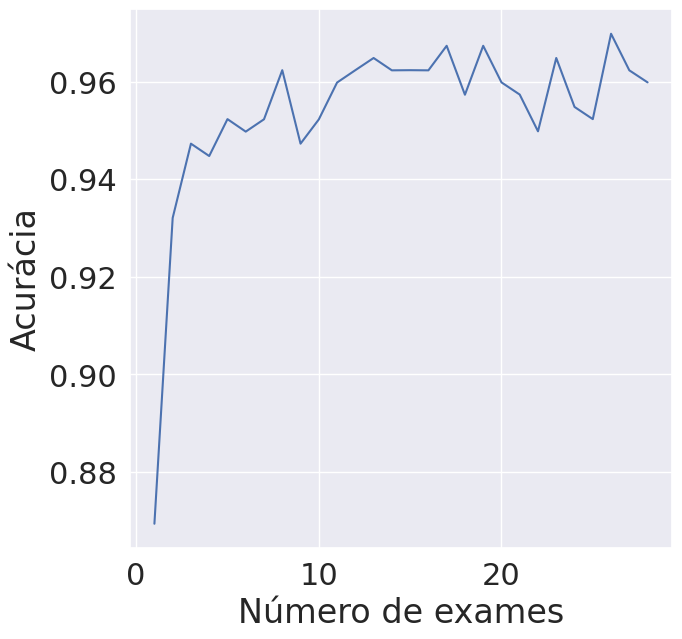

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
plt.xlabel("Número de exames")
plt.ylabel("Acurácia")

plt.plot(range(1, len(selecionar_rfecv.cv_results_['mean_test_score']) + 1), selecionar_rfecv.cv_results_['mean_test_score'])
plt.show

Resultado da classificação 87.13%


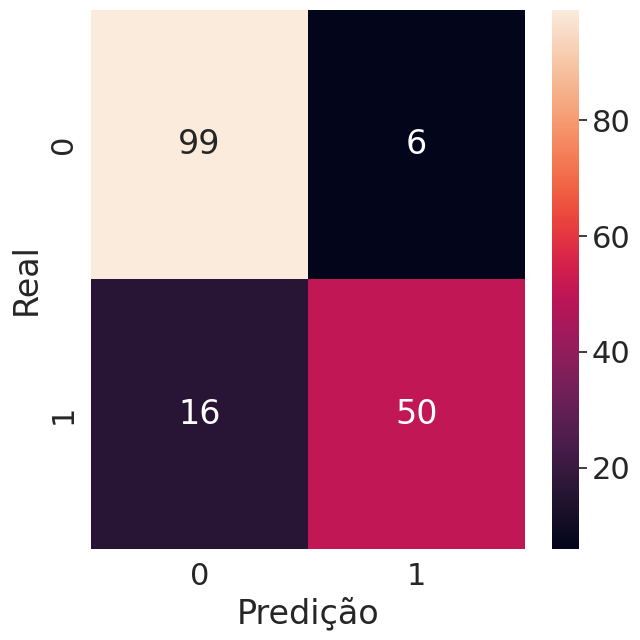

In [ ]:
from sklearn.feature_selection import RFE 

SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6,
                                                        diagnostico,
                                                        test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_x, treino_y)
selecionar_rfe = RFE(estimator=classificador, n_features_to_select=2, step = 1)
selecionar_rfe.fit(treino_x,treino_y)
treino_rfe = selecionar_rfe.transform(treino_x)
teste_rfe = selecionar_rfe.transform(teste_x)

classificador.fit(treino_rfe, treino_y)

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfe))
plt.figure(figsize=(7,7))
sns.set(font_scale=2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel="Predição",ylabel="Real") 

print("Resultado da classificação %.2f%%" %(classificador.score(teste_rfe, teste_y)*100))

In [ ]:
valores_exames_v7 = selecionar_rfe.transform(valores_exames_v6)

<Axes: >

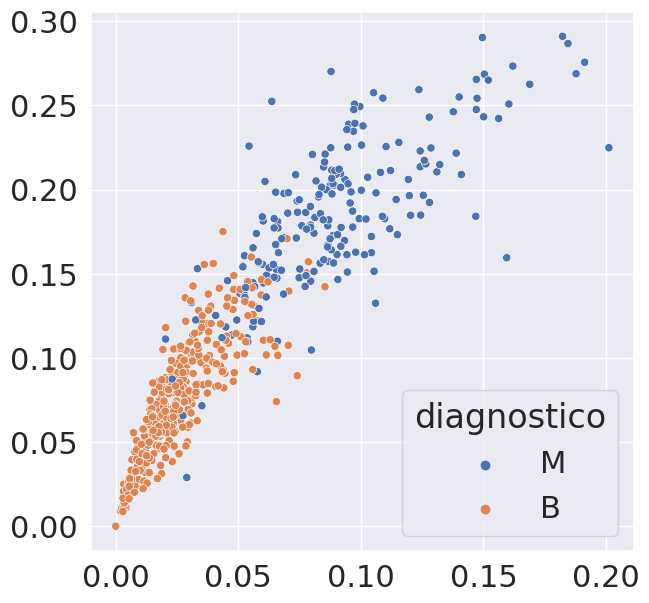

In [ ]:
import seaborn as sns

plt.figure(figsize=(7,7))
sns.scatterplot(x=valores_exames_v7[:,0], y=valores_exames_v7[:,1], hue=diagnostico)



<Axes: >

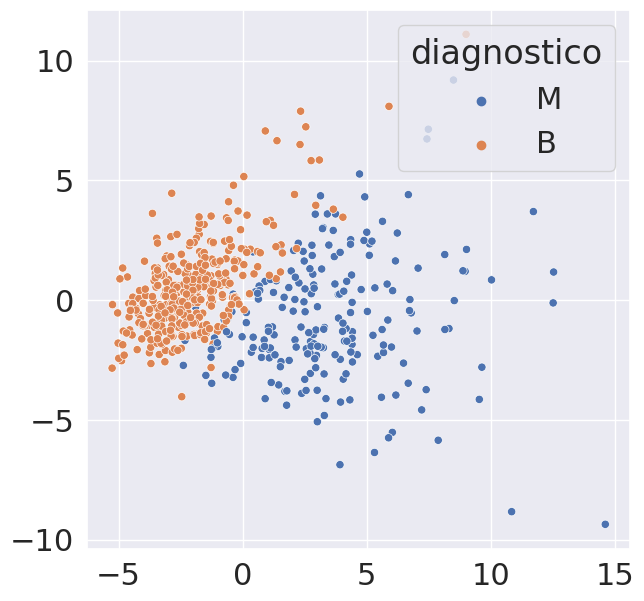

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
valores_exames_v8 = pca.fit_transform(valores_exames_v5)

plt.figure(figsize=(7,7))
sns.scatterplot(x=valores_exames_v8[:,0], y=valores_exames_v8[:,1], hue=diagnostico)




<Axes: >

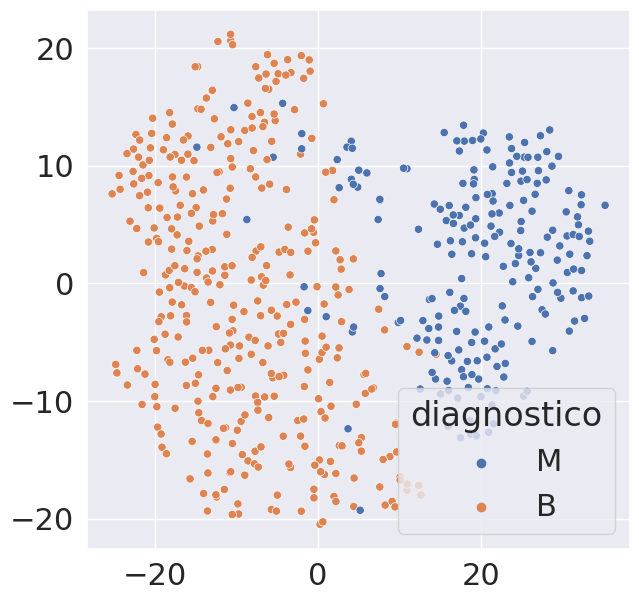

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
valores_exames_v9 = tsne.fit_transform(valores_exames_v5)

plt.figure(figsize=(7,7))
sns.scatterplot(x=valores_exames_v9[:,0], y=valores_exames_v9[:,1], hue=diagnostico)